In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources")

In [3]:
os.getcwd()

'C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0


In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.510090e+07,39.885000,99748.227500,0.357500
std,2.862593e+06,11.796596,28374.358336,0.479864
min,1.001684e+07,20.000000,50075.000000,0.000000
25%,1.260593e+07,30.000000,76060.250000,0.000000
50%,1.509874e+07,40.000000,99205.000000,0.000000
75%,1.741296e+07,51.000000,122748.000000,1.000000
max,1.999616e+07,60.000000,149553.000000,1.000000


In [8]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
dataset.index

RangeIndex(start=0, stop=400, step=1)

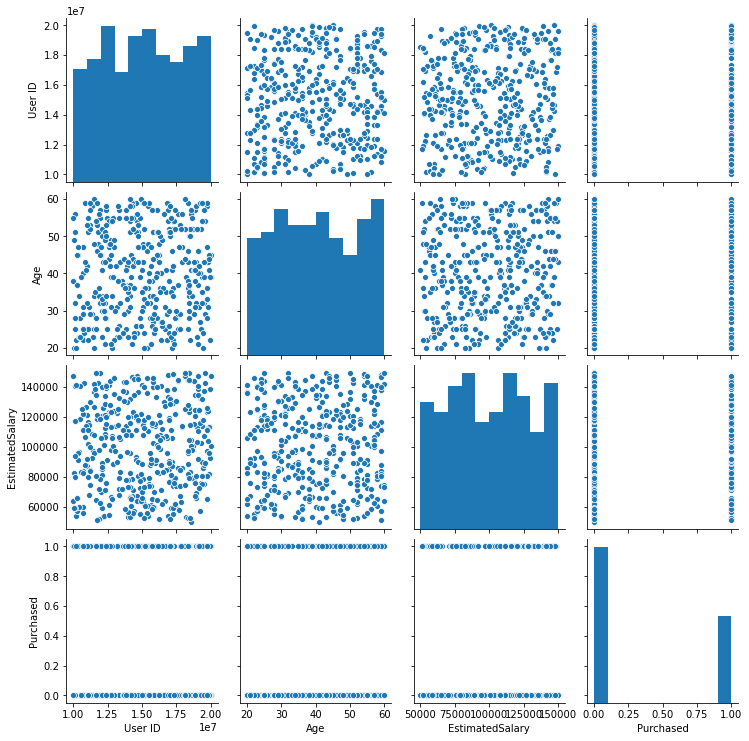

In [11]:
sns.pairplot(dataset)

In [12]:
dataset["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [13]:
#cleanup_nums = {"Gender":     {"Male": 1, "Female": 2}}       #method to encode categorical variable using find and replace method       

In [14]:
#dataset = dataset.replace(cleanup_nums)
#dataset.head()

In [15]:
#corr_matrix = dataset.corr()
#corr_matrix['Purchased'].sort_values(ascending=False)

In [16]:
x = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values    # splitting data into x and y

In [17]:
x

array([['Male', 42, 121315],
       ['Male', 53, 67214],
       ['Female', 59, 111005],
       ...,
       ['Female', 25, 82560],
       ['Male', 55, 147667],
       ['Female', 54, 134972]], dtype=object)

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [19]:
#data preprocessing through column transformer and one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(x))
print(X)

[[0.0 1.0 42 121315]
 [0.0 1.0 53 67214]
 [1.0 0.0 59 111005]
 ...
 [1.0 0.0 25 82560]
 [0.0 1.0 55 147667]
 [1.0 0.0 54 134972]]


In [20]:
pd.DataFrame(X)

,0,1,2,3
0,0,1,42,121315
1,0,1,53,67214
2,1,0,59,111005
3,1,0,39,53414
4,0,1,39,114285
...,...,...,...,...
395,1,0,20,141231
396,0,1,50,75848
397,1,0,25,82560
398,0,1,55,147667


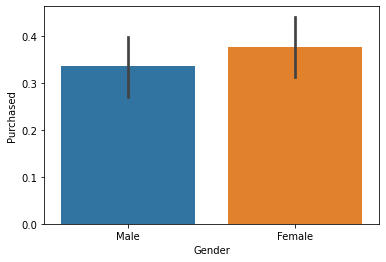

In [21]:
sns.barplot(x='Gender',y='Purchased',data=dataset)

In [22]:
from sklearn.preprocessing import StandardScaler    # to make the data in  standard format to read
sc = StandardScaler()  # feature scaling because salary and age are both in different scale
x=sc.fit_transform(X)

In [23]:
pd.DataFrame(x)

,0,1,2,3
0,-1.020204,1.020204,0.179514,0.761032
1,-1.020204,1.020204,1.113154,-1.148043
2,0.980196,-0.980196,1.622412,0.397220
3,0.980196,-0.980196,-0.075116,-1.635006
4,-1.020204,1.020204,-0.075116,0.512962
...,...,...,...,...
395,0.980196,-0.980196,-1.687767,1.463812
396,-1.020204,1.020204,0.858525,-0.843373
397,0.980196,-0.980196,-1.263385,-0.606525
398,-1.020204,1.020204,1.282906,1.690920


In [24]:
corr_matrix = dataset.corr()
corr_matrix['Purchased'].sort_values(ascending=False)

Purchased          1.000000
Age                0.058196
User ID            0.054821
EstimatedSalary   -0.043013
Name: Purchased, dtype: float64

In [25]:
#seperate data into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [26]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# prediction for x_test
y_pred = logmodel.predict(x_test)

In [28]:
y_pred # model saying no one purchasing product

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
y_test #but actually some  are purchasing product therefore accuracy is not good

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [30]:
# concept of confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[53,  0],
       [27,  0]], dtype=int64)

In [31]:
#59+0/41+0+39+0   
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6625

In [32]:
len(y_test)  # will not go with logistic regression as there are no person in second column

80

In [33]:
# k nearest neighbour  algo applying
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =KNeighborsClassifier(n_neighbors=11,metric='euclidean',p=2)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [34]:
y_pred_knn = classifier_knn.predict(x_test)

In [35]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [36]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_knn)

array([[48,  5],
       [25,  2]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.625

In [39]:
# naiye baise algo application
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_pred_nb = classifier_nb.predict(x_test)

In [41]:
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nb)

array([[53,  0],
       [27,  0]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_nb)

0.6625

In [45]:
# support vector machine application through sigmoid kernel
from sklearn.svm import SVC
classifier_svm_sig = SVC(kernel='sigmoid')
classifier_svm_sig.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
pred_svm_sig = classifier_svm_sig.predict(x_test)

In [47]:
pred_svm_sig

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_sig)

array([[34, 19],
       [21,  6]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_sig)

0.5

In [50]:
# support vector machine application through linear kernel
from sklearn.svm import SVC
classifier_svm_lin = SVC(kernel='linear')
classifier_svm_lin.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred_svm_lin = classifier_svm_lin.predict(x_test)

In [52]:
y_pred_svm_lin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_lin)

array([[53,  0],
       [27,  0]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_lin)

0.6625

In [55]:
# support vector machine application through polynomial kernel
from sklearn.svm import SVC
classifier_svm_poly = SVC(kernel='poly')
classifier_svm_poly.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred_svm_poly = classifier_svm_poly.predict(x_test)

In [57]:
y_pred_svm_poly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_poly)

array([[53,  0],
       [27,  0]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_poly)

0.6625

In [60]:
# support vector machine application through rbf kernel
from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel='rbf')
classifier_svm_rbf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_pred_svm_rbf = classifier_svm_rbf.predict(x_test)

In [62]:
y_pred_svm_rbf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_rbf)

array([[53,  0],
       [27,  0]], dtype=int64)

In [64]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm_rbf)

0.6625

In [65]:
#running decision tree algo
from sklearn.tree import DecisionTreeClassifier
classifier_dt =DecisionTreeClassifier(criterion='entropy') # also can use gini
classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
y_pred_dt =classifier_dt.predict(x_test)

In [67]:
y_pred_dt

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dt)

array([[34, 19],
       [18,  9]], dtype=int64)

In [69]:
# accuracy score calculation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.5375

In [70]:
# running random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_rf =RandomForestClassifier(n_estimators=3, criterion='entropy')
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred_rf =classifier_rf.predict(x_test)

In [72]:
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rf)

array([[40, 13],
       [17, 10]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.625